<a href="https://colab.research.google.com/github/caesar013/PCVK_GENAP_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

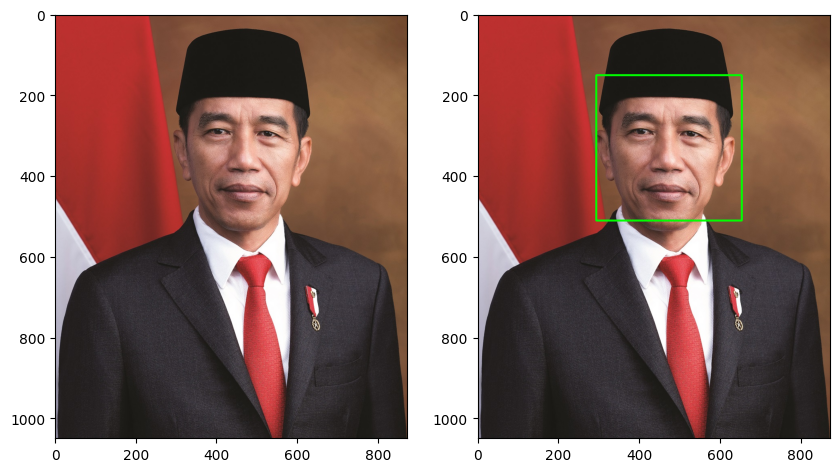

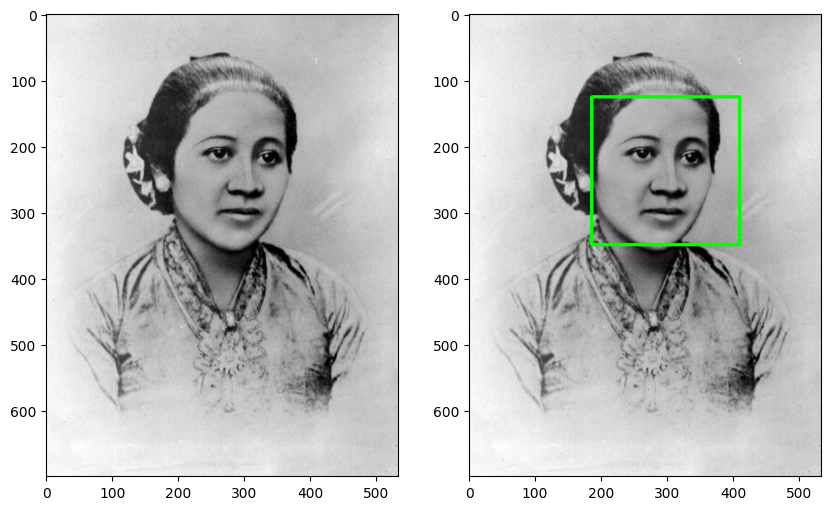

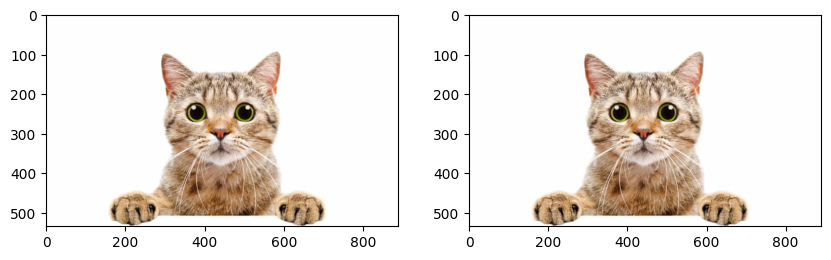

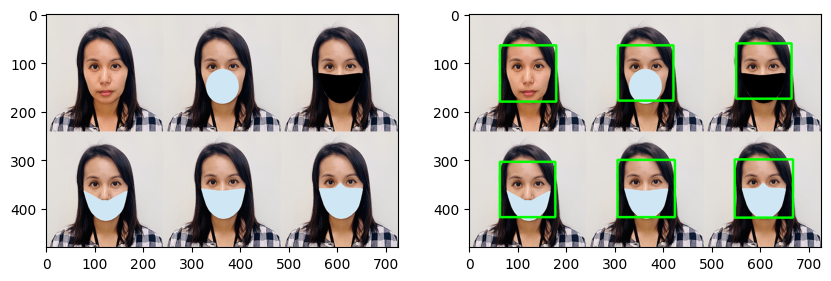

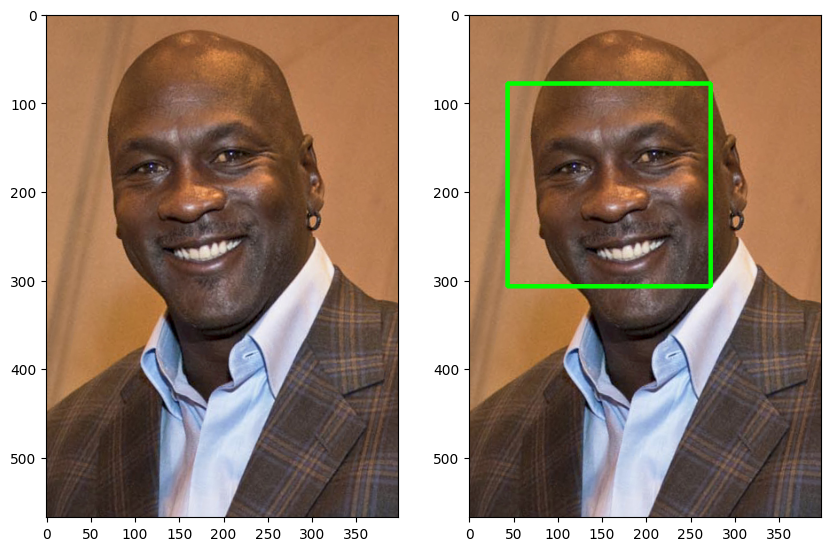

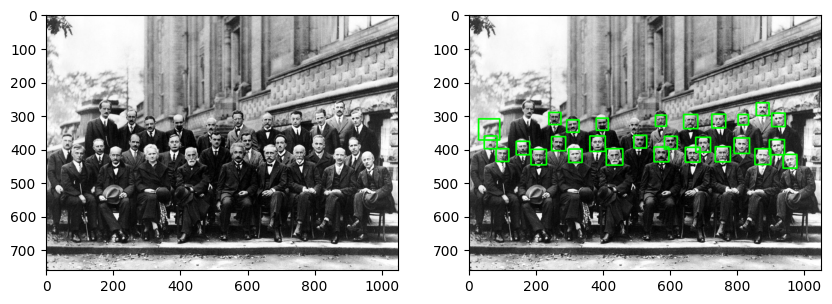

In [4]:
def detect_face(img, cascade):
  cascade_wajah = cv.CascadeClassifier(cascade)
  img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img_1 = img_rgb.copy()
  roi_wajah = cascade_wajah.detectMultiScale(img_1)

  for(x,y,w,h) in roi_wajah:
    cv.rectangle(img_1,(x,y),(x+w,y+h),(0,255,0), 4)

  plt.figure(figsize = (10,10))
  plt.subplot(121), plt.imshow(img_rgb)
  plt.subplot(122), plt.imshow(img_1)

path = '/content/drive/MyDrive/PCVK/Images for PCVK/facedet'
list_face = ['jokowi.jpg', 'kartini.jpg', 'kucing.jpg', 'mask.png', 'mjordan.jpg', 'solvayconf.jpg']

for name_file in list_face:
  img = cv.imread(os.path.join(path, name_file))
  cascade = '/content/drive/MyDrive/PCVK/Images for PCVK/haarcascades/haarcascade_frontalface_alt.xml'
  detect_face(img, cascade)

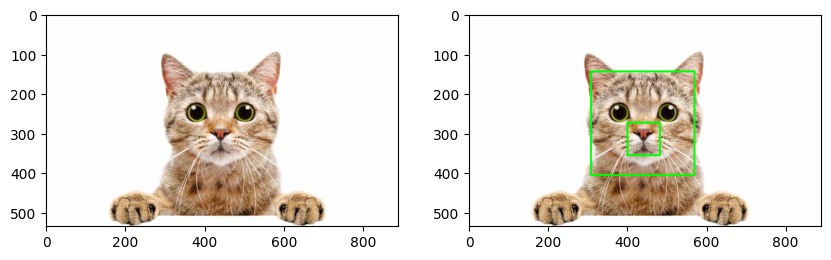

In [5]:
cat_image = cv.imread('/content/drive/MyDrive/PCVK/Images for PCVK/facedet/kucing.jpg')
cascade = '/content/drive/MyDrive/PCVK/Images for PCVK/haarcascades/haarcascade_frontalcatface.xml'
detect_face(cat_image, cascade)

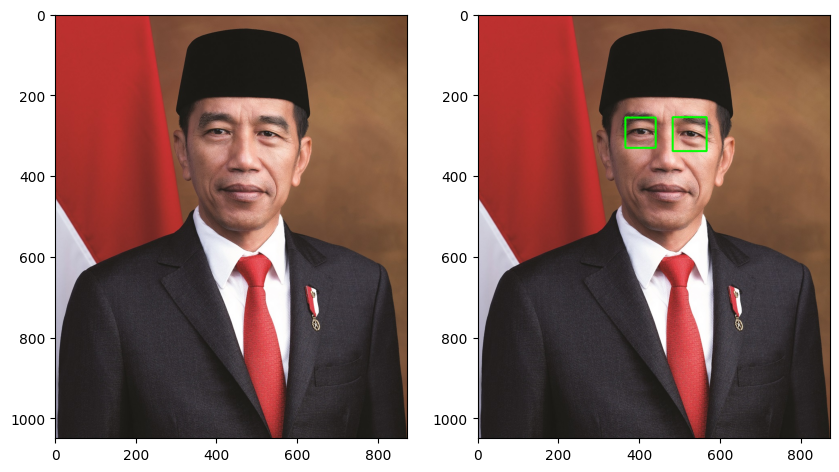

In [7]:
path = '/content/drive/MyDrive/PCVK/Images for PCVK/facedet/jokowi.jpg'

img = cv.imread(path)
cascade = '/content/drive/MyDrive/PCVK/Images for PCVK/haarcascades/haarcascade_eye.xml'
detect_face(img, cascade)

In [8]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io

In [9]:
 #function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):

  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [10]:
# initialize the Haar Cascade face detection model
face_cascade = cv.CascadeClassifier(cv.samples.findFile(cv.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [11]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


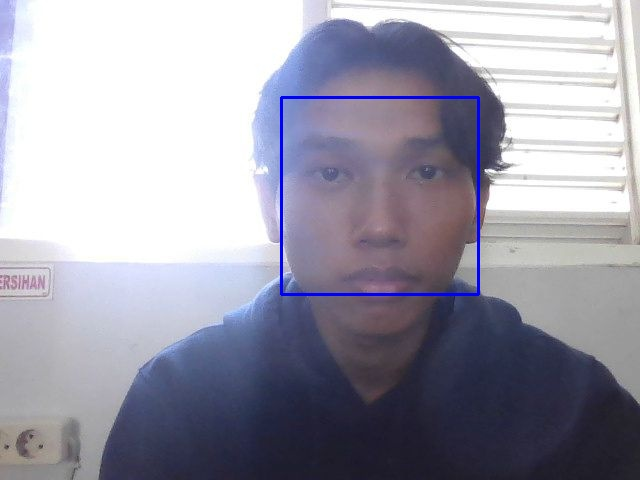

In [17]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

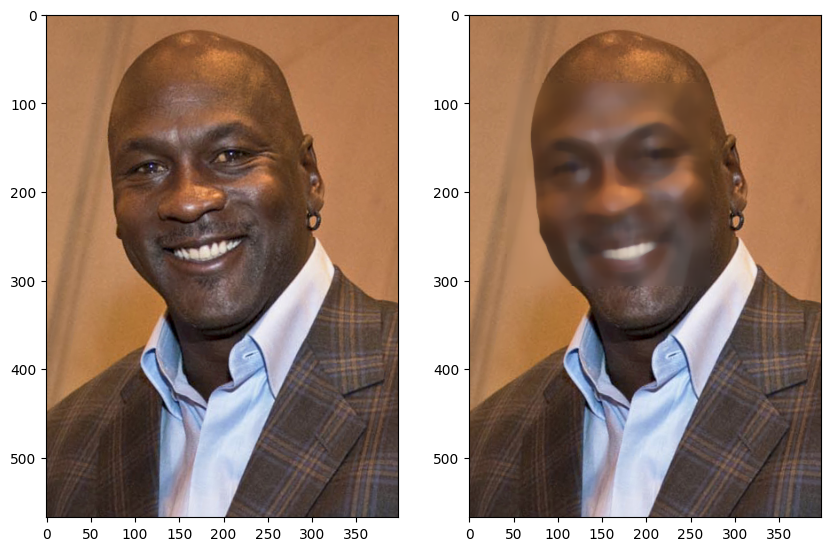

In [20]:
def blur_face(img):
  cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images for PCVK/haarcascades/haarcascade_frontalface_alt.xml')
  img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img_1 = img_rgb.copy()
  roi_wajah = cascade_wajah.detectMultiScale(img_1)

  for(x,y,w,h) in roi_wajah:
    roi = img_1[y:y+h, x:x+w]
    blur = cv.medianBlur(roi, 15)
    img_1[y:y+h, x:x+w] = blur

  plt.figure(figsize = (10,10))
  plt.subplot(121), plt.imshow(img_rgb)
  plt.subplot(122), plt.imshow(img_1)

path = '/content/drive/MyDrive/PCVK/Images for PCVK/facedet/mjordan.jpg'

img = cv.imread(path)
blur_face(img)

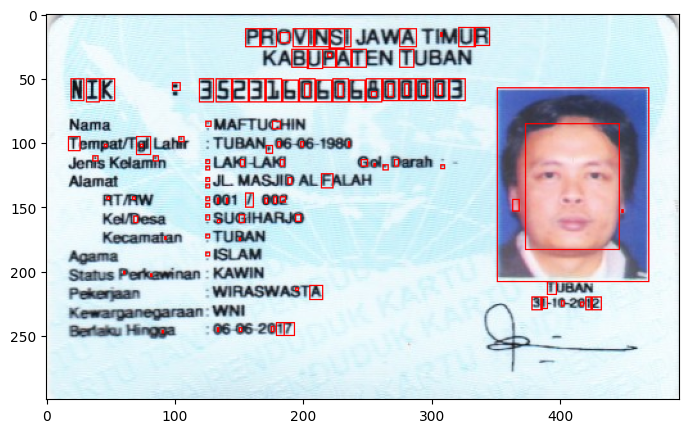

In [6]:
ktp = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp3.png')

blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))

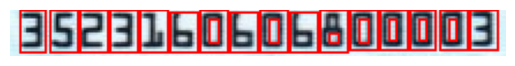

In [7]:
crop_y_start = 50
crop_y_end = 70

# Menentukan koordinat awal dan akhir untuk melakukan cropping pada sumbu x
crop_x_start = 115
crop_x_end = 330

# Melakukan cropping pada gambar 'ktp' berdasarkan koordinat yang telah ditentukan
cropped_image = ktp[crop_y_start:crop_y_end, crop_x_start:crop_x_end]

# Menampilkan gambar hasil cropping
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [8]:
import os
import pickle
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam

# Memuat dataset MNIST
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Menentukan jumlah sampel per kelas
num_samples_per_class = 100

# Menentukan digit yang akan diekstrak
digits_to_extract = list(range(10))

# Fungsi untuk mengekstrak sampel dari dataset
def extract_samples(X, y, digits, num_samples):
    samples = []
    for digit in digits:
        digit_indices = np.where(y == digit)[0]
        selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
        samples.extend([(X[i], digit) for i in selected_indices])
    return samples

# Mengekstrak sampel dari dataset pelatihan
training_data = extract_samples(X_train, y_train, digits_to_extract, num_samples_per_class)

# Mengacak urutan data pelatihan
np.random.shuffle(training_data)

# Memisahkan fitur dan label
X, Y = zip(*training_data)

# Mengubah bentuk fitur menjadi (-1, 28, 28, 1)
X = np.array(X).reshape(-1, 28, 28, 1)

# Menyimpan fitur ke file pickle
pickle_out = open("X_mnist.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

# Menyimpan label ke file pickle dalam bentuk one-hot encoding
pickle_out = open("Y_mnist.pickle", "wb")
pickle.dump(to_categorical(Y, num_classes=10), pickle_out)
pickle_out.close()

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
# Mengimpor library yang diperlukan
from keras.models import load_model, Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical

# Memuat fitur dan label dari file pickle
X_train = pickle.load(open("X_mnist.pickle", "rb"))
Y_train = pickle.load(open("Y_mnist.pickle", "rb"))

# Normalisasi fitur dengan membaginya dengan 255
X_train = X_train.astype('float32') / 255

# Fungsi untuk membuat model
def create_model():
    model = Sequential()
    # Menambahkan layer ZeroPadding2D
    model.add(ZeroPadding2D((1, 1), input_shape=(28, 28, 1)))
    # Menambahkan layer Conv2D dengan 64 filter dan fungsi aktivasi ReLU
    model.add(Conv2D(64, (3, 3), activation='relu'))
    # Menambahkan layer MaxPooling2D
    model.add(MaxPooling2D((2, 2)))
    # Menambahkan layer Conv2D dengan 128 filter dan fungsi aktivasi ReLU
    model.add(Conv2D(128, (3, 3), activation='relu'))
    # Menambahkan layer MaxPooling2D
    model.add(MaxPooling2D((2, 2)))
    # Menambahkan layer Flatten untuk meratakan output sebelum memasukkannya ke layer Dense
    model.add(Flatten())
    # Menambahkan layer Dense dengan 128 neuron dan fungsi aktivasi ReLU
    model.add(Dense(128, activation='relu'))
    # Menambahkan layer Dense dengan 10 neuron (untuk 10 kelas) dan fungsi aktivasi softmax
    model.add(Dense(10, activation='softmax'))
    return model

# Membuat model
model = create_model()

# Mengompilasi model dengan optimizer Adam, loss function categorical_crossentropy, dan metrik akurasi
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model dengan data pelatihan
model.fit(X_train, Y_train, epochs=10, batch_size=128)

# Menyimpan model ke file 'mnist_model.h5'
model.save('mnist_model.h5')

Epoch 1/10
8/8 [==============================] - 5s 345ms/step - loss: 1.8937 - accuracy: 0.4130
Epoch 2/10
8/8 [==============================] - 3s 413ms/step - loss: 0.8525 - accuracy: 0.7500
Epoch 3/10
8/8 [==============================] - 3s 419ms/step - loss: 0.4711 - accuracy: 0.8530
Epoch 4/10
8/8 [==============================] - 3s 331ms/step - loss: 0.3434 - accuracy: 0.8930
Epoch 5/10
8/8 [==============================] - 2s 243ms/step - loss: 0.2484 - accuracy: 0.9210
Epoch 6/10
8/8 [==============================] - 2s 247ms/step - loss: 0.1701 - accuracy: 0.9470
Epoch 7/10
8/8 [==============================] - 2s 252ms/step - loss: 0.1218 - accuracy: 0.9670
Epoch 8/10
8/8 [==============================] - 2s 256ms/step - loss: 0.0940 - accuracy: 0.9780
Epoch 9/10
8/8 [==============================] - 2s 308ms/step - loss: 0.0698 - accuracy: 0.9830
Epoch 10/10
8/8 [==============================] - 3s 413ms/step - loss: 0.0462 - accuracy: 0.9890


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Tugas

In [10]:
# Load the input image
ktp = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/KTP7.jpeg')

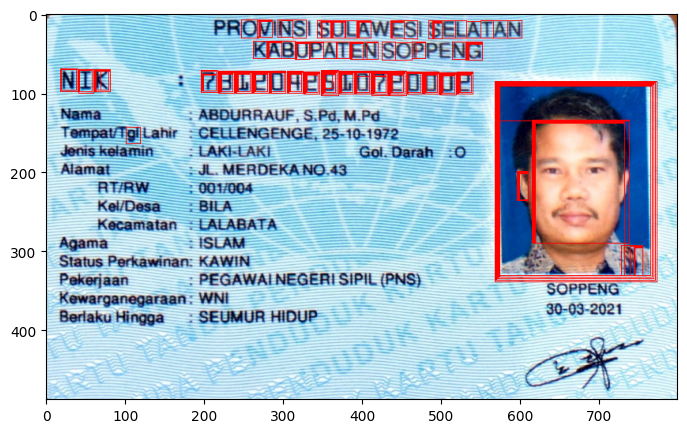

In [15]:
# Melakukan blur pada gambar 'ktp' menggunakan Gaussian blur
blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

# Mengubah gambar ke grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
# Melakukan thresholding pada gambar grayscale menggunakan metode Otsu
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Melakukan erosi pada gambar threshold
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Mencari kontur pada gambar erosi
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Untuk setiap kontur, menggambar kotak merah di sekitar kontur pada gambar asli jika memenuhi kondisi tertentu
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    if h >= 20 and w >= 10 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Menampilkan gambar hasil deteksi kontur
plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))

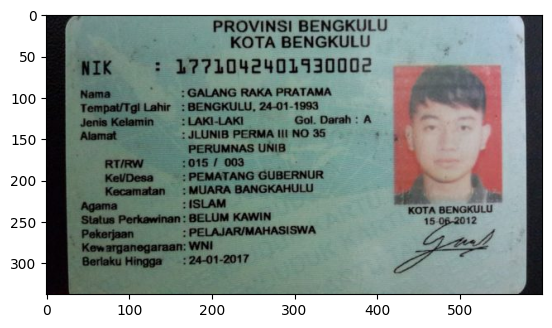

In [186]:
import cv2

# Membaca gambar 'KTP7.jpeg'
img = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp1.png')

# Menampilkan gambar dengan mengubahnya dari BGR ke RGB
plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))

<Figure size 800x1200 with 0 Axes>

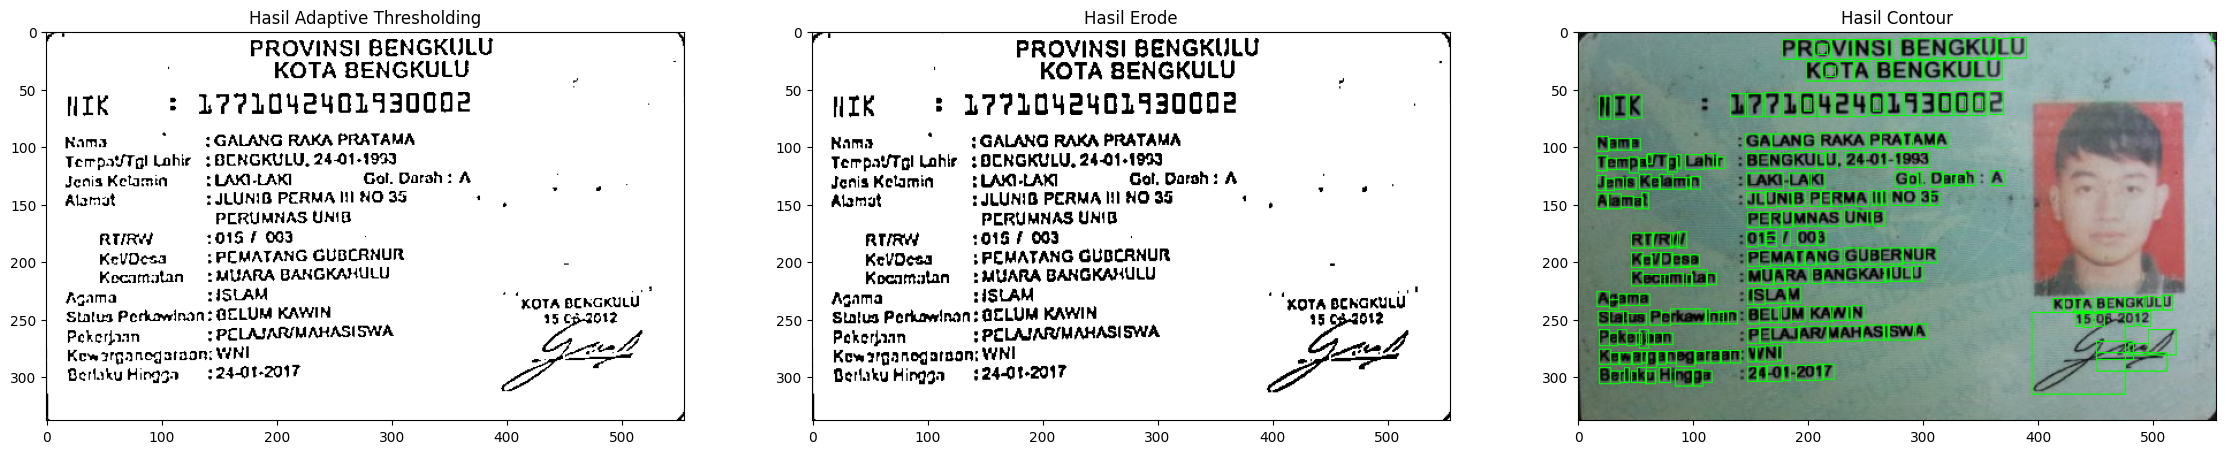

In [187]:
# Memotong gambar untuk menghilangkan bagian yang tidak perlu
img = img[:, 25:580]

plt.figure(figsize=(8, 12)) # Membuat figure dengan ukuran 8x12

# Mengaburkan gambar dengan Gaussian Blur
blurred_image = cv2.GaussianBlur(img, (3,3), 0)

# Mengubah gambar menjadi grayscale
img_gray = cv2.cvtColor(blurred_image, cv.COLOR_BGR2GRAY)
# Melakukan equalization pada gambar grayscale
equalized_image = cv2.equalizeHist(img_gray)

block_size = 11
constant = 15

# Melakukan adaptive thresholding pada gambar grayscale
thresholded_image = cv2.adaptiveThreshold(
    img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, constant)

# Membuat kernel berukuran 2x1 untuk operasi morfologi
kernel = np.ones((2, 1), np.uint8)

# Melakukan operasi erosi pada gambar yang telah di threshold
morph_image = cv2.erode(thresholded_image,  kernel, iterations=1)

# Mencari kontur pada gambar
contours, hierarchy = cv.findContours(morph_image.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
for cnt in contours: # Untuk setiap kontur yang ditemukan
    x, y, w, h = cv.boundingRect(cnt) # Mendapatkan koordinat dan ukuran bounding box

    ras = format(w / h, '.2f') # Menghitung rasio antara lebar dan tinggi bounding box

    if h >= 8 and w >= 4 and float(ras) <= 4: # Jika tinggi >= 8, lebar >= 4, dan rasio <= 4

      # Membuat rectangle pada gambar asli dengan koordinat dan ukuran dari bounding box
      cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), thickness=1)

# Mengubah gambar menjadi RGB
contour_image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# Mengubah gambar hasil erosi menjadi RGB
eroded_image = cv.cvtColor(morph_image, cv.COLOR_GRAY2RGB)
# Mengubah gambar hasil thresholding menjadi RGB
thresholded_image = cv.cvtColor(thresholded_image, cv.COLOR_GRAY2RGB)

fig, axs = plt.subplots(1, 3, figsize=(28, 10)) # Membuat subplot dengan 1 baris dan 3 kolom

axs[0].imshow(thresholded_image) # Menampilkan gambar hasil thresholding pada subplot pertama
axs[0].set_title('Hasil Adaptive Thresholding') # Memberikan judul pada subplot pertama

axs[1].imshow(eroded_image) # Menampilkan gambar hasil erosi pada subplot kedua
axs[1].set_title('Hasil Erode') # Memberikan judul pada subplot kedua

axs[2].imshow(contour_image) # Menampilkan gambar hasil deteksi kontur pada subplot ketiga
axs[2].set_title('Hasil Contour') # Memberikan judul pada subplot ketiga

plt.show() # Menampilkan semua subplot

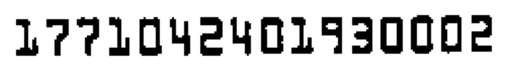

In [188]:
# Melakukan cropping pada gambar 'ktp' berdasarkan koordinat yang telah ditentukan
crop_img = eroded_image[50:80, 130:375]

# Menampilkan gambar hasil cropping
plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [19]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 9 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 0s (13.1 MB/s)
debconf: unable to initi

In [189]:
# Mengimpor library yang diperlukan
import pytesseract
import imutils
import PIL

# Menggunakan gambar hasil cropping sebelumnya
img = crop_img.copy()

# # Mengubah gambar ke grayscale
# gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# # Melakukan thresholding pada gambar grayscale
# _, threshed = cv.threshold(gray, 128, 255, cv.THRESH_BINARY)

# Menggunakan pytesseract untuk mengenali teks pada gambar threshold
result = pytesseract.image_to_string(PIL.Image.fromarray(img), lang="ind")

# Menampilkan hasil pengenalan teks
print("NIK pada e-KTP:", result)

NIK pada e-KTP: 17?1042401930002

